This guest post by Rachel Walker (github: @rachelnwalker) is the second of a few posts covering some of the new or improved features in the 2023.09.1 RDKit release.



In [1]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG=True
%pylab inline
import rdkit
print(rdkit.__version__)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
2023.09.1


# Using ring system templates in 2D Coordinate Generation

Beginning in the 2023.03.1 release, it is possible to use ring system templates when generating 2D coordinates to improve the depiction of some complicated ring systems and macrocycles. There are currently around 70 pre-existing templates, but you are also able to define and use custom templates. The current templates are sourced from [coordgenlibs](https://github.com/schrodinger/coordgenlibs).

You can use the default ring system templates by setting `useRingTemplates` to `True` in `rdDepictor.Compute2DCoords`

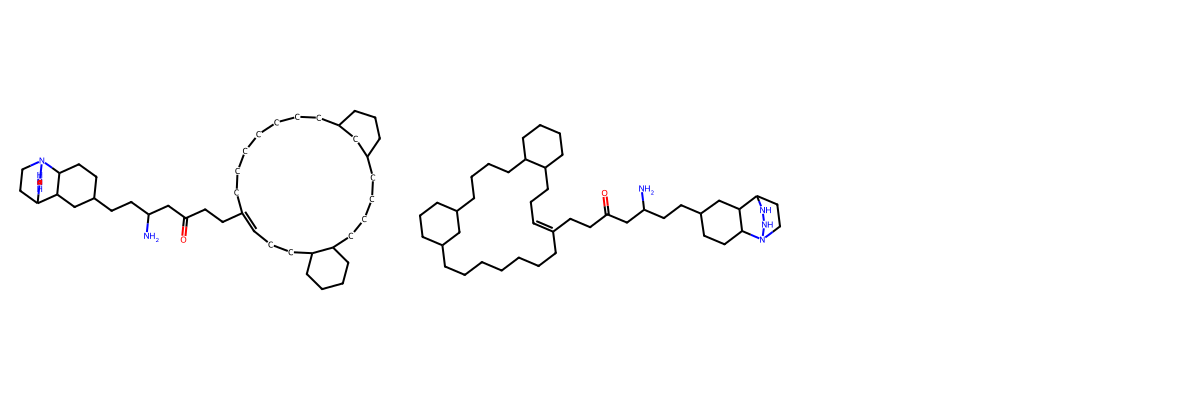

In [2]:
mol = Chem.MolFromSmiles("NC(CCC1CCC2C(C1)C1CCN2NN1)CC(=O)CCC1=CCCC2CCCCC2CCCCC2CCCC(CCCCCCC1)C2")
mol_with_templates = Chem.Mol(mol)

# use rdkit native coordinate generation
rdDepictor.SetPreferCoordGen(False)
rdDepictor.Compute2DCoords(mol)

# the first time you call this, 
rdDepictor.Compute2DCoords(mol_with_templates, useRingTemplates=True)

Draw.MolsToGridImage([mol, mol_with_templates], subImgSize=(400,400))

## Example uses of default templates

Templates can be used for common, complex ring systems that the standard 2D coordinate generation algorithm distorts. They are also useful if you want certain ring systems to be laid out in a specific way (for example, cubane).

### Templates by themselves

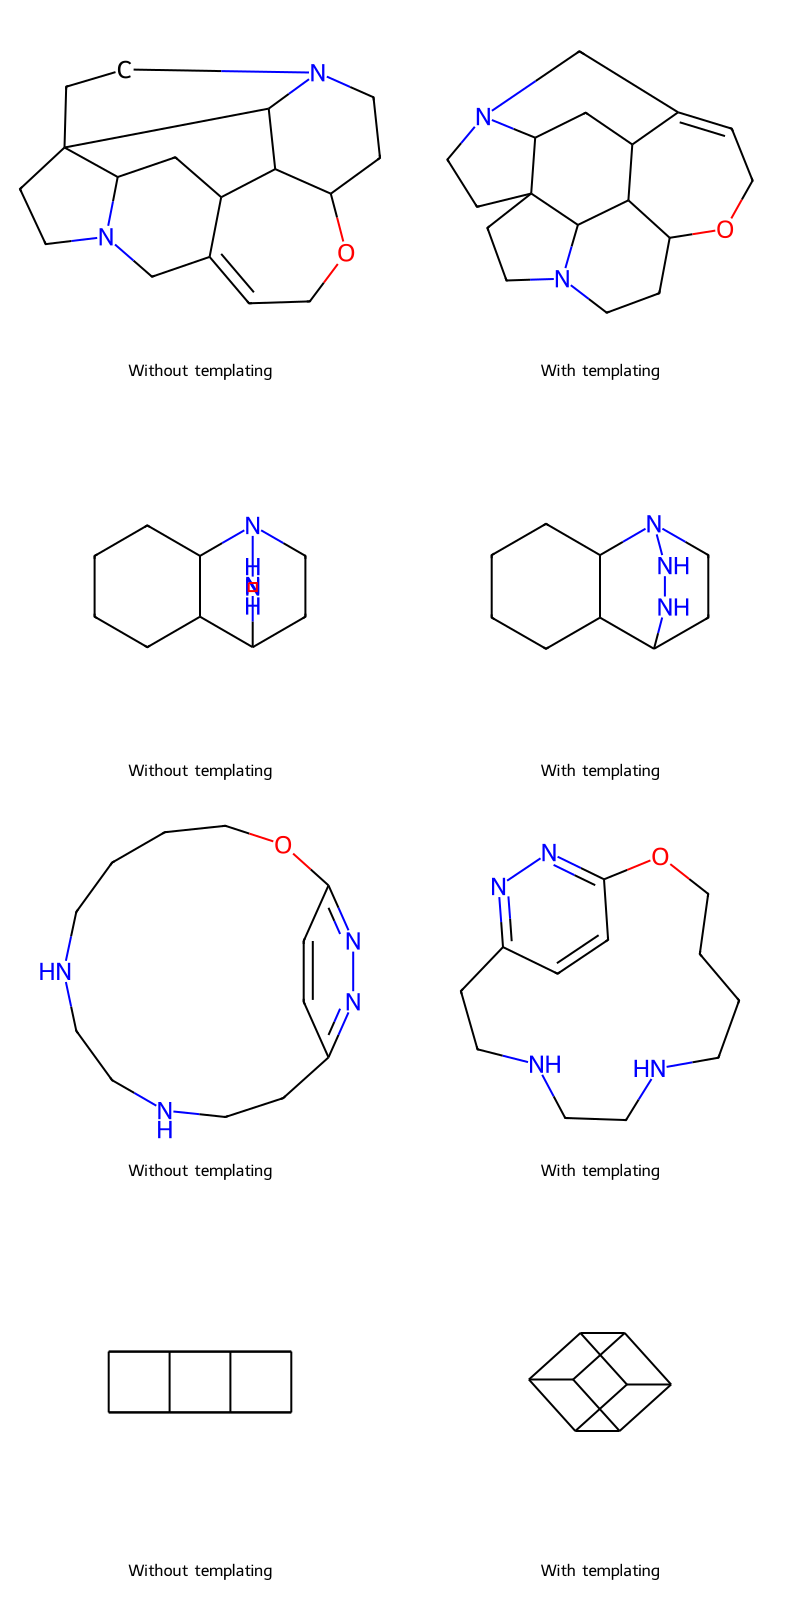

In [3]:
mols = [Chem.MolFromSmiles("C1=C2CN3CCC45CCN6CCC(OC1)C(C2CC34)C65"),
        Chem.MolFromSmiles("C1CCC2C(C1)C1CCN2NN1"),
        Chem.MolFromSmiles("c1cc2nnc1CCNCCNCCCCO2"),
        Chem.MolFromSmiles("C12C3C4C1C1C2C3C41")]
mols_with_templates = [Chem.Mol(m) for m in mols]

legends = []
allmols = []
for m, m_with_t in zip(mols, mols_with_templates):
    rdDepictor.Compute2DCoords(m, useRingTemplates=False)
    rdDepictor.Compute2DCoords(m_with_t, useRingTemplates=True)
    allmols.append(m)
    allmols.append(m_with_t)
    legends.append("Without templating")
    legends.append("With templating")
    
Draw.MolsToGridImage(allmols, legends=legends, molsPerRow=2, subImgSize=(400,400))

### Template matches within a larger structure

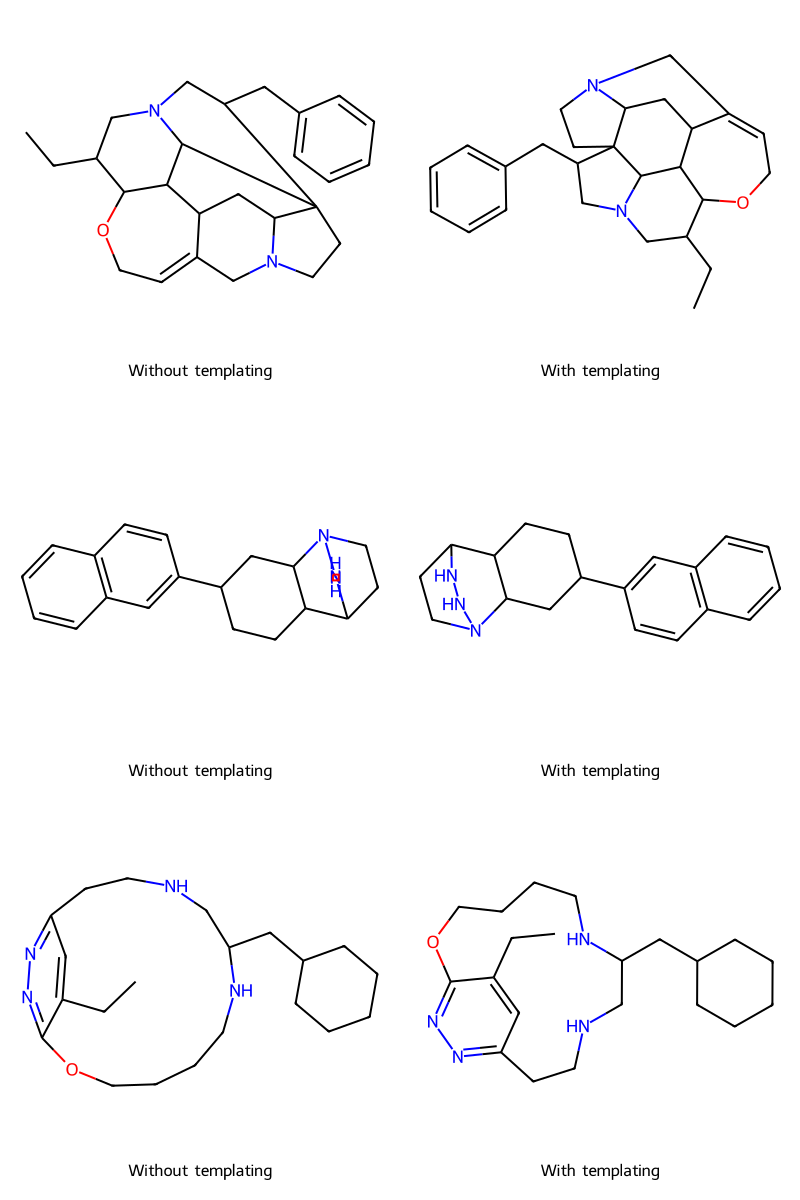

In [4]:
mols = [Chem.MolFromSmiles("CCC1CN2CC(CC3=CC=CC=C3)C34CCN5CC6=CCOC1C(C23)C6CC45"),
        Chem.MolFromSmiles("C1CC2C3CCN(NN3)C2CC1C1=CC2=C(C=CC=C2)C=C1"),
        Chem.MolFromSmiles("CCc1cc2CCNCC(CC3CCCCC3)NCCCCOc1nn2")]
mols_with_templates = [Chem.Mol(m) for m in mols]

legends = []
allmols = []
for m, m_with_t in zip(mols, mols_with_templates):
    rdDepictor.Compute2DCoords(m, useRingTemplates=False)
    rdDepictor.Compute2DCoords(m_with_t, useRingTemplates=True)
    allmols.append(m)
    legends.append("Without templating")
    allmols.append(m_with_t)
    legends.append("With templating")
    
Draw.MolsToGridImage(allmols, legends=legends, molsPerRow=2, subImgSize=(400,400))

### Multiple template matches in a single structure

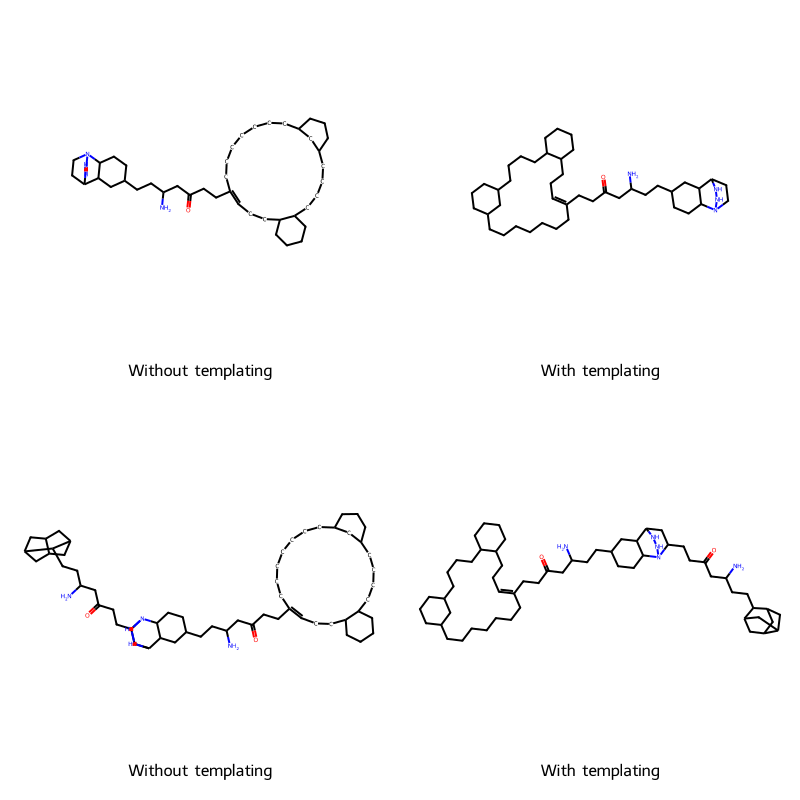

In [5]:
m1 = Chem.MolFromSmiles("NC(CCC1CCC2C(C1)C1CCN2NN1)CC(=O)CCC1=CCCC2CCCCC2CCCCC2CCCC(CCCCCCC1)C2")
m2 = Chem.MolFromSmiles("NC(CCC1CCC2C(C1)C1CC(CCC(=O)CC(N)CCC3C4CC5CC3CC5C4)N2NN1)CC(=O)CCC1=CCCC2CCCCC2CCCCC2CCCC(CCCCCCC1)C2")
m1_templates = Chem.Mol(m1)
m2_templates = Chem.Mol(m2)

rdDepictor.Compute2DCoords(m1, useRingTemplates=False)
rdDepictor.Compute2DCoords(m2, useRingTemplates=False)
rdDepictor.Compute2DCoords(m1_templates, useRingTemplates=True)
rdDepictor.Compute2DCoords(m2_templates, useRingTemplates=True)

Draw.MolsToGridImage([m1, m1_templates, m2, m2_templates], legends=['Without templating', 'With templating', 'Without templating', 'With templating'], molsPerRow=2, subImgSize=(400,400))

## Setting custom templates

You can set your own templates using `rdDepictor.SetRingSystemTemplates`. This will replace all of the default templates, while `rdDepictor.AddRingSystemTemplates` will add to any templates that are already present (the most recently added templates will be given preference). 

Custom templates should be defined in a .smi file, with each line representing a single template using CXSMILES. Templates must be a connected graph (no fragments) and have 2D coordinates defined, and they need to consist of a single ring or fused ring system (spiros are OK).

Example: I made `my_templates.smi` with a single template:

C1CC2CCOC3OC4CCC(C1)C23OO4 |(-0.5537,-3.1595,;-1.6057,-2.003,;-1.4262,-0.4072,;-2.9804,0.0271,;-3.5191,1.502,;-2.2028,2.3562,;-0.6818,1.8511,;1.0592,1.4391,;2.6123,1.8366,;3.5191,0.5341,;2.6067,-0.7521,;1.0061,-0.773,;0.7888,-2.3546,;-0.0405,0.5251,;0.4049,2.3,;1.7604,3.1594,)|

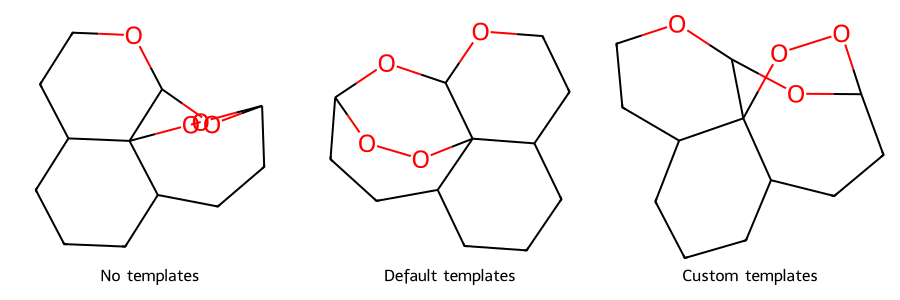

In [7]:
m = Chem.MolFromSmiles("C1CC2CCOC3OC4CCC(C1)C23OO4")
m_default_templates = Chem.Mol(m)
m_custom_templates = Chem.Mol(m)

rdDepictor.Compute2DCoords(m, useRingTemplates=False)
rdDepictor.Compute2DCoords(m_default_templates, useRingTemplates=True)

# Set ring system templates
rdDepictor.SetRingSystemTemplates("../data/my_templates.smi")
rdDepictor.Compute2DCoords(m_custom_templates, useRingTemplates=True)

Draw.MolsToGridImage([m, m_default_templates, m_custom_templates], legends=['No templates', 'Default templates', 'Custom templates'], molsPerRow=3, subImgSize=(300,300))

You can set the templates back to the original ones by calling `LoadDefaultRingSystemTemplates`

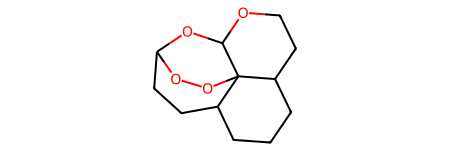

In [8]:
rdDepictor.LoadDefaultRingSystemTemplates()
rdDepictor.Compute2DCoords(m, useRingTemplates=True)
m

## Limitations

As of this release, there are several limitations to the templating that we plan on addressing in the future:

1. Only ring system templates are supported, it would be nice to be able to template some complicated stereochemistry
2. Template matching only considers the first substructure match, even when other matches would result in better depictions
3. Quality and quantity of templates could be vastly improved, we still don't have a wide variety of macrocycles and the existing templates are specific bond order and atom type

Example where #2 would be helpful:

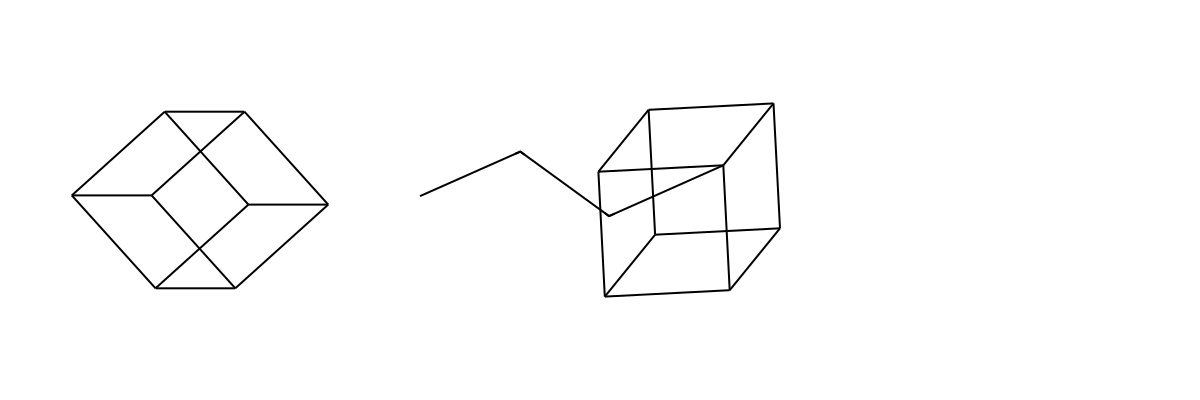

In [9]:
cubane = Chem.MolFromSmiles("C12C3C4C1C1C2C3C41")
cubane_with_path = Chem.MolFromSmiles("CCCC12C3C4C5C3C1C5C24")

rdDepictor.Compute2DCoords(cubane, useRingTemplates=True)
rdDepictor.Compute2DCoords(cubane_with_path, useRingTemplates=True)

Draw.MolsToGridImage([cubane, cubane_with_path], subImgSize=(400,400))

# How to contribute templates using the molecular_templates repo!

There is a new repository on github that we will use to collect and store templates here https://github.com/rdkit/molecular_templates. You can contribute ring system template(s) by opening a PR and adding your templates in CXSMILES format to the `templates.smi` file. More details can be found in the README file on Github. Additions or changes to the templates in this repository will automatically be incorporated into the next RDKit release.

You can view all of the current templates (which are sourced from coordgenlibs, Schrödinger's 2D coordinate generation software) in the gallery: https://github.com/rdkit/molecular_templates/blob/main/gallery.md 

Ricardo (github: @ricrogz) set up some awesome Github actions so that we can visualize the template you suggest in your pull request! Here is an example: https://github.com/rdkit/molecular_templates/pull/7